# 8.1. Aplicación de una función a una columna

In [57]:
from datascience import *
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Definir una función que mande el menor valor entre x y 100
def cut_off_at_100(x):
    """ the smaller of x and 100 """
    return min(x, 100)

In [59]:
cut_off_at_100(45)

45

** creamos una tabla con datos de personas y sus edades

In [60]:
ages = Table().with_columns(
    'Persona', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Años', make_array(17, 117, 52, 100, 6, 101)    
)


In [61]:
ages

Persona,Años
A,17
B,117
C,52
D,100
E,6
F,101


In [62]:
#Aplicamos la función cut_off_at_100
ages.apply(cut_off_at_100, 'Años')

array([ 17, 100,  52, 100,   6, 100])

In [63]:
#Agregamos una nueva label, es decir, 
#el arry que acabamos de formar con la función apply y aplicando la función creada
ages.with_column(
    'Edad de corte', ages.apply(cut_off_at_100, 'Años')
)


Persona,Años,Edad de corte
A,17,17
B,117,100
C,52,52
D,100,100
E,6,6
F,101,100


# 8.1.2 Funciones como valores

In [64]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

## 8.1.3. Ejemplo: Predicción

In [65]:
# Data on heights of parents and their adult children
family_heights = Table.read_table('family_heights.csv').drop(3)
family_heights

family,father,mother,children,childNum,sex,childHeight
1,78.5,67,4,1,male,73.2
1,78.5,67,4,2,female,69.2
1,78.5,67,4,3,female,69
1,78.5,67,4,4,female,69
2,75.5,66.5,4,1,male,73.5
2,75.5,66.5,4,2,male,72.5
2,75.5,66.5,4,3,female,65.5
2,75.5,66.5,4,4,female,65.5
3,75,64,2,1,male,71
3,75,64,2,2,female,68


In [84]:
# Esta altura media de los padres es nuestra variable predictora . 
# En la celda siguiente, sus valores están en la matriz parent_averages.
parent_averages = (family_heights.column('father')+ family_heights.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('childHeight')
)

heights

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


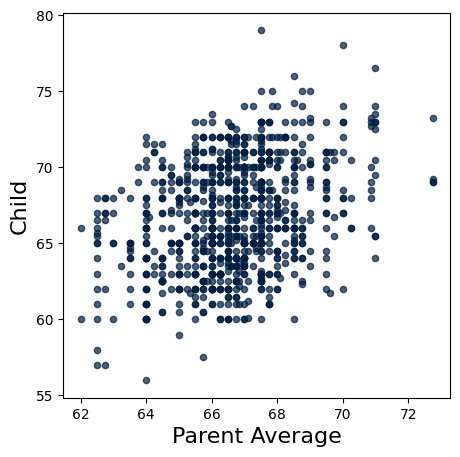

In [76]:
heights.scatter('Parent Average')

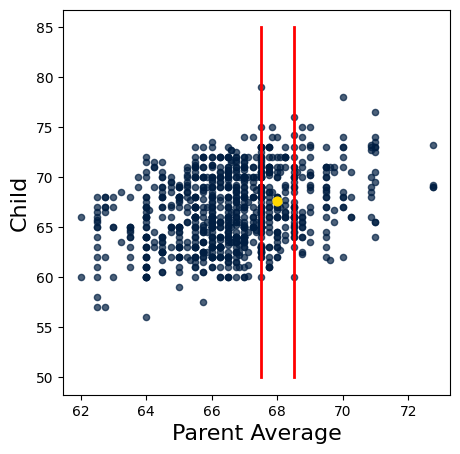

In [81]:
heights.scatter('Parent Average')
plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plt.scatter(68, 67.62, color='gold', s=40);